<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Data

In [ ]:
!pip install pandas numpy matplotlib


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import random

# Apply the 'ggplot' style
style.use('ggplot')


In [ ]:

def create_data(n, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(n):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step

    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


In [ ]:
xs_neg, ys_neg = create_data(100, variance=10, step=2, correlation='neg')


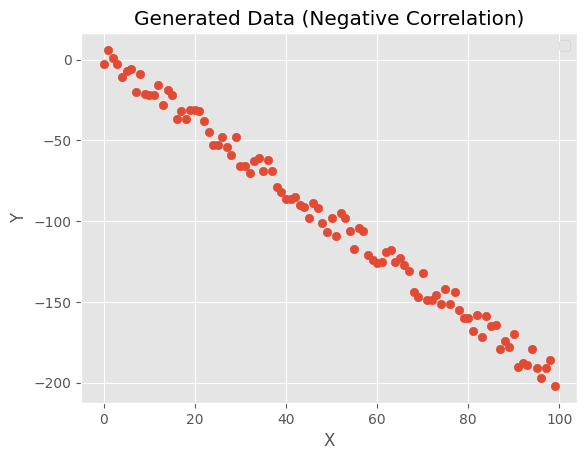

In [ ]:
plt.scatter(xs_neg, ys_neg)
plt.title("Generated Data (Negative Correlation)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Creating the linear regression function

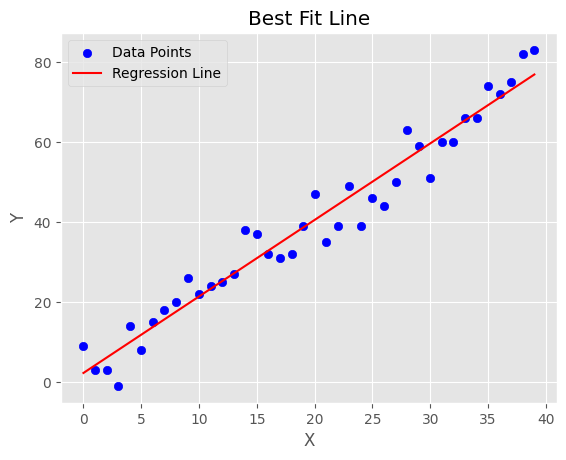

In [ ]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((np.mean(xs) * np.mean(ys)) - np.mean(xs * ys)) /
         ((np.mean(xs) ** 2) - np.mean(xs * xs)))
    b = np.mean(ys) - m * np.mean(xs)
    return m, b

xs, ys = create_data(40, variance=10, step=2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs, ys)

regression_line = [(m * x) + b for x in xs]

plt.scatter(xs, ys, color='blue', label='Data Points')
plt.plot(xs, regression_line, color='red', label='Regression Line')
plt.title("Best Fit Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#checking the linear reqression squared


In [ ]:
def coefficient_of_determination(ys_orig , ys_line):
  ys_mean_line = [np.mean(ys_orig) for y in ys_orig]
  squared_error_reg= sum((ys_line - ys_orig)**2)
  squared_error_mean = sum((ys_mean_line - ys_orig)**2)

  re_sq = 1 - squared_error_reg/squared_error_mean

  return re_sq



In [ ]:
xs_neg, ys_neg = create_data(100, variance=1, step=2, correlation='neg')


In [ ]:
re_sq = coefficient_of_determination(ys , regression_line)
print(re_sq)

0.9534861770538183


# Nonlinear Regression

In [ ]:
import requests
url = "https://apmonitor.com/che263/uploads/Main/heart_rate.txt"


In [ ]:
response = requests.get(url)

In [ ]:
if response.status_code == 200:
    with open("heart_rate.txt", "w") as file:
        file.write(response.text)
    print("File downloaded and saved as 'heart_rate.txt'")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded and saved as 'heart_rate.txt'


In [ ]:
import pandas as pd

hr= pd.read_csv('heart_rate.txt')

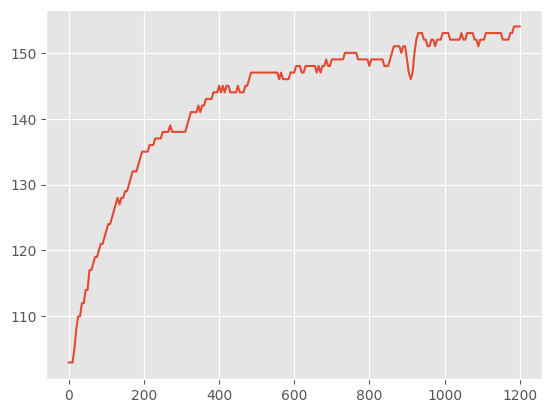

In [ ]:
plt.plot(hr['Time (sec)'] , hr['Heart Rate (BPM)'])

In [ ]:
def BPM(c0,t , c1 , c2 , c3 ):
  return c0 + c1 -c2*np.exp(-c3*t)

In [ ]:
guess = [500 , 0.01 , 80 ,  0.01]

In [ ]:
len_ = len(hr['Time (sec)'])
y1= np.zeros(len_)

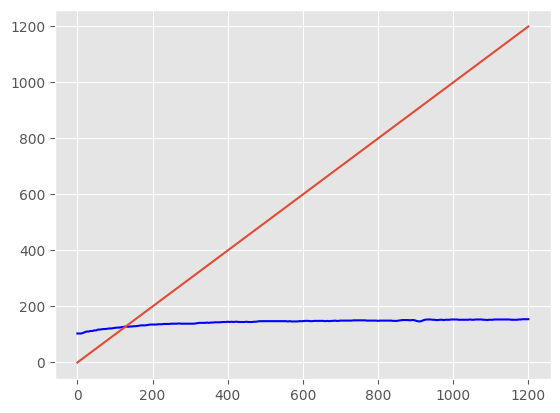

In [ ]:
for i in range(len_):
  y1[i] = BPM(hr['Time (sec)'][i] , guess[0] , guess[1] , guess[2] , guess[3])

plt.plot(hr['Time (sec)'] , hr['Heart Rate (BPM)'], 'b')
plt.plot(hr['Time (sec)'] , y1)

In [ ]:
from scipy.optimize import curve_fit
c, cov = curve_fit(BPM, hr['Time (sec)'].values, hr['Heart Rate (BPM)'].values, guess)
print(c)

[-1.21527386e+04 -4.57016597e+02  1.02021560e+04 -2.43054773e-01]


<ipython-input-65-ae8524f1eff6>:2: OptimizeWarning: Covariance of the parameters could not be estimated
  c, cov = curve_fit(BPM, hr['Time (sec)'].values, hr['Heart Rate (BPM)'].values, guess)


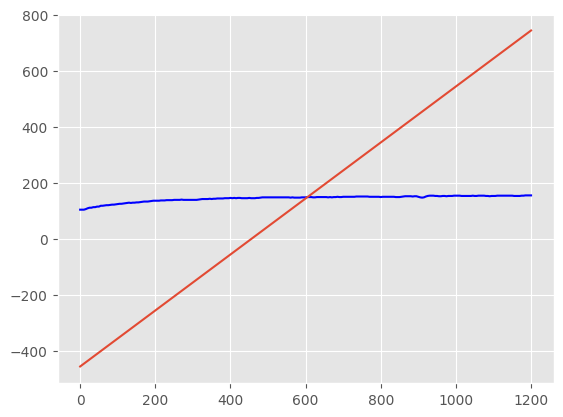

In [ ]:
y2= np.zeros(len_)
for i in range(len_):
  y2[i]= BPM(hr['Time (sec)'][i] ,c[0],c[1], c[2] , c[3] )

plt.plot(hr['Time (sec)'] , hr['Heart Rate (BPM)'] , 'b')
plt.plot(hr['Time (sec)'] , y2)

In [ ]:
from sklearn.metrics import r2_score
print('R2:' , r2_score(hr['Heart Rate (BPM)'] , y2))

R2: -884.7933400214193


# Knearest Neighbors

Features shape: (150, 4)
Target shape: (150,)
Training features shape: (120, 4)
Testing features shape: (30, 4)
[5.7 2.8 4.1 1.3]


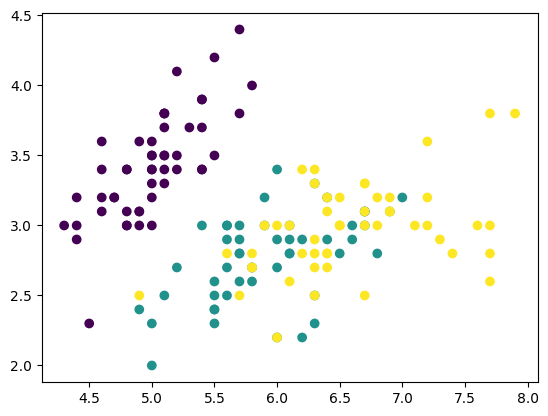

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris.data, iris.target

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)
knn = KNeighborsClassifier()
print("Features shape:", x.shape)
print("Target shape:", y.shape)
print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)

print(x_train[0])

from matplotlib.colors import ListedColormap
colormap = ListedColormap(['b' , 'r' , 'g'])
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')




In [ ]:
knn= KNeighborsClassifier()
knn.fit(x_train , y_train)

pre = knn.predict(x_test)
print(pre)

[0 1 2 2 2 0 2 1 2 2 2 0 2 2 2 1 0 1 0 0 2 2 1 0 1 0 2 0 1 0]


In [ ]:
def Accu(y_test , pre):
  acc = np.sum(y_test==pre)/len(y_test)
  return acc

In [ ]:
print('Accuracy : ' , Accu(y_test , pre))

Accuracy :  0.9666666666666667


Creating KNeighbors functionality

In [ ]:
import numpy as np
from collections import Counter

def ED(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

    def __init__(self, K=3):
        self.K = K
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        y_pred = [self.predict_most_common(x) for x in X]
        return y_pred

    def predict_most_common(self, x):
        distances = [ED(x, x_tr) for x_tr in self.X_train]

        k_indices = np.argsort(distances)[:self.K]

        k_labels = [self.Y_train[i] for i in k_indices]

        most_common = Counter(k_labels).most_common(1)

        return most_common[0][0]


In [ ]:
K = 6
cls_ = KNN(K=K)

cls_.fit(x_train, y_train)

pre = cls_.predict(x_test)

print("Accuracy:", Accu(y_test, pre))

from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=K)
sklearn_knn.fit(x_train, y_train)
sklearn_predictions = sklearn_knn.predict(x_test)
sklearn_accuracy = np.sum(y_test == sklearn_predictions) / len(y_test)
print("Sklearn KNN Accuracy:", sklearn_accuracy)

Accuracy: 0.9666666666666667
Sklearn KNN Accuracy: 0.9666666666666667


# Logistic Regressiin

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

ds = datasets.load_breast_cancer()
x=ds.data
y=ds.target
print(ds)
print('columns of the data: ' , ds.target_names)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [16]:
x_trai,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2)
LR = LogisticRegression()
LR.fit(x,y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pre = LR.predict(x_test)
pre


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1])

In [22]:
def Accuracy(y_true , y_pre):
  return sum((y_true == y_pre)/len(y_true))
print('Accuracy : ' , Accuracy(y_test , pre))

Accuracy :  0.9385964912280723
